In [17]:
import pandas as pd
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [78]:
tickers = ['KO', 'MCD', 'PEP', 'YUM']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, 'quandl', '1995-1-1')['AdjClose']

In [79]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5848 entries, 2018-03-26 to 1995-01-03
Data columns (total 4 columns):
KO     5848 non-null float64
MCD    5848 non-null float64
PEP    5848 non-null float64
YUM    5163 non-null float64
dtypes: float64(4)
memory usage: 228.4 KB


In [80]:
mydata.head()

,KO,MCD,PEP,YUM
Date,,,,
2018-03-26,42.69,158.01,106.81,84.03
2018-03-23,42.33,154.98,106.15,81.68
2018-03-22,42.76,157.04,107.94,82.18
2018-03-21,43.00,158.66,108.74,82.81
2018-03-20,43.16,159.38,109.90,83.09


In [81]:
mydata.tail()

,KO,MCD,PEP,YUM
Date,,,,
1995-01-09,7.445565,8.972466,9.888997,NaN
1995-01-06,7.558081,8.895462,9.852140,NaN
1995-01-05,7.558081,8.972466,9.852140,NaN
1995-01-04,7.595586,8.932424,10.064776,NaN
1995-01-03,7.745608,8.972466,10.172512,NaN


## Normization to 100:   (pricet/price0) * 100

In [82]:
mydata.iloc[0]

KO      42.69
MCD    158.01
PEP    106.81
YUM     84.03
Name: 2018-03-26 00:00:00, dtype: float64

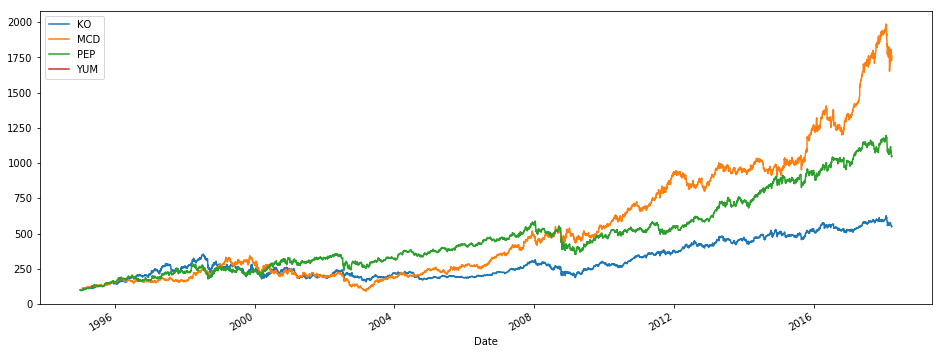

In [83]:
(mydata / mydata.iloc[-1] * 100).plot(figsize = (16, 6)); 
plt.show()

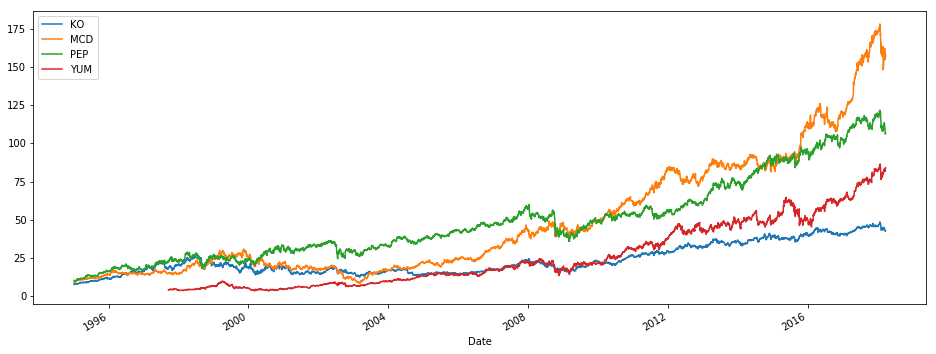

In [84]:
mydata.plot(figsize=(16,6))
plt.show()

In [85]:
mydata.loc['1995-1-3']

,KO,MCD,PEP,YUM
Date,,,,
1995-01-03,7.745608,8.972466,10.172512,NaN


In [86]:
mydata.iloc[0]

KO      42.69
MCD    158.01
PEP    106.81
YUM     84.03
Name: 2018-03-26 00:00:00, dtype: float64

## Calculating the Return of a Portfolio of Securities

In [87]:
#calculating for simple returns
returns = (mydata / mydata.shift(-1)) -1 
returns.tail()

,KO,MCD,PEP,YUM
Date,,,,
1995-01-09,-0.014887,0.008657,0.003741,NaN
1995-01-06,0.000000,-0.008582,0.000000,NaN
1995-01-05,-0.004938,0.004483,-0.021127,NaN
1995-01-04,-0.019369,-0.004463,-0.010591,NaN
1995-01-03,NaN,NaN,NaN,NaN


In [88]:
#creating a new array that holds the weight of each stock 
#in the portfolio
weights = np.array([0.25, 0.25, 0.25, 0.25])

In [89]:
#np.dot calculates vector or matrix products straight away
np.dot(returns,weights)

array([ 0.01576099, -0.01146032, -0.00768917, ...,         nan,
               nan,         nan])

In [90]:
annual_returns = returns.mean() * 250
annual_returns

KO     0.097542
MCD    0.151409
PEP    0.126140
YUM    0.196917
dtype: float64

In [91]:
np.dot(annual_returns, weights)

0.1430019147124778

In [92]:
portfolio1 = str(round(np.dot(annual_returns, weights), 5) * 100) + '%'

In [93]:
portfolio1

'14.3%'

In [94]:
weights2 = np.array([0.4, 0.4, .15, 0.05])

In [95]:
portfolio2 = str(round(np.dot(annual_returns, weights2), 5) * 100) + '%'
print portfolio1
print portfolio2

14.3%
12.835%
